Root node is: OD
ulysses path: ['OD', '0X', '1M', '1N', '1O', '1P', '1Q', '1R', '1S', '23', '2X', 'DI', '03', '04', '05', 'AG', '0D', '0E', '1H', '26', '32', '33', '34', '35', 'AC', '0M', '0L', '2I', 'AH', '2J', 'HT', '02', '01', 'AE', '0F', '07', '08', '0G', '0H', '0I', '0J', '0K', '3V', 'AJ', '0W', '1J', '1U', '3N', '3O', '3P', '3Q', '3R', '47', '4P', '4V', '4Y', '5T', '6M', '6N', '8W', '8T', '8U', '8V', '8X', 'NE', '5A', '57', 'PO', '1K', '0P', '0N', '0O', '0Q', '0R', '0S', 'AA', 'AF', 'AI', '3T', '4C', 'AO', '31', 'PD', '2W', '4H', '4I', '4J', '4K', '4L', 'PS', '36', '4G', '0C', '1I', 'AL', '06', '3W', '3X', '3Y', '3Z', '40', '93', '44', '45', '46', '92', '94', '22', '41', '42', '43', '95', '6Y', '96', '98', '9A', '9B', '9C', 'AX', '4N', '6R', 'MT', '6I', '6J', '6O', '6Q', 'TU', '24', '2N', '2O', '2P', '2Q', '2R', '2S', '2T', '2U', '2V', '48', '49', 'PR', '0T', '0U', '4A', '4B', 'ID', '11', '59', '7S', '7R', '7T', '9W', '9V', '9X', 'AR', '2C', '2B', '2A', 'BL', '29', '83', 'ZE', '1

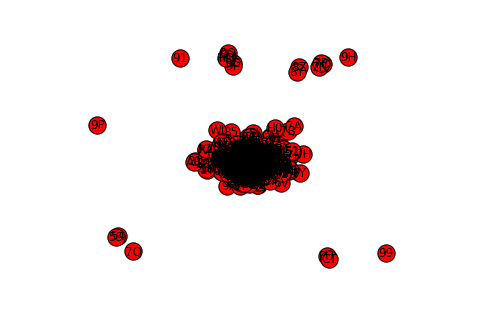

In [4]:
%matplotlib inline

import matplotlib
import numpy as np
import matplotlib.pyplot as plt
import networkx as nx
import urllib2
import itertools

def read_nodes(gfile):
    """Reads in the nodes of the graph from the input file.
    
    Args:
        gfile: A handle for the file containing the graph data, starting at the top.
        
    Returns:
        A generator of the nodes in the graph, yielding a list of the form:
            ['CH', 'AG, 'ME', ...]
    """
    #1.read the URL contents line by line
    #2.Skip the ones that have comment or have semicolon indicating edges or empty
    #3.spit on space character and get teh first element which is the node
    homer = ""
    homer = urllib2.urlopen(gfile.geturl())
    infile = homer.read()
    data = infile.split("\n")
    Nodes = []
    for line in data:
        if not line.strip():
            continue
        if '*' not in line and ';' not in line:
            Nodes.append(line.split()[0])
    return Nodes


def read_edges(gfile):
    """Reads in the edges of the graph from the input file.
    
    Args:
        gfile: A handle for the file containing the graph data, starting at the top 
            of the edges section.
            
    Returns:
        A generator of the edges in the graph, yielding a list of pairs of the form:
            [('CH', 'AG'), ('AG', 'ME'), ...]
    """
    #1.read the URL contents line by line
    #2.Skip the ones that have comment or do not have semicolon indicating nodes or empty
    #3.spit on : and ; character.Ignore teh first element.
    #4.For every edge group seperated by ;, get nC2 combinations
    homer = ""
    homer = urllib2.urlopen(gfile.geturl())
    infile = homer.read()
    data = infile.split("\n")
    Edges = []
    for line in data:
        if not line.strip():
            continue
        if '*' not in line and ';' in line:
            EdgeGroups = line.replace(':',';').split(';')[1:]
            for group in EdgeGroups:
                EdgeList =list(itertools.combinations(group.split(","),2))
                Edges.extend(EdgeList)
    return Edges    

def Search(G, root):
    """Runs depth-first search through a graph, starting at a given root. Neighboring
    nodes are processed in alphabetical order.
    
    Args:
        graph: the given graph, with nodes encoded as strings.
        root: the node from which to start the search.
        
    Returns:
        A list of nodes in the order in which they were first visited.
    """
    ##1.get a list of nodes reachable from root and sort them aplphabetically.
    DFS_tree = []
    print "Root node is:",root
    #####
    ## AASSUMPTION:IF NO ROOT NODE IS SUPPLIED,RETURN EMPTY
    #####
    if len(root) <= 0:
        print "no root node specified ,returning empty"
        return DFS_tree
    root_neighbours=list(G[root]) 
    root_neighbours.sort()
    
    ##2.use a stack data structure to store parent child 
    #relationship for each child note reachable from parent 
    #adding parent is helpful for debugging and finding which node added a new node
    stack = [(root,iter(root_neighbours))]
    
    ##3.Initialize visited data structure and add root to it as first seen node
    visited=set()
    visited.add(root)
    DFS_tree.extend([root])
    ##4.while there are unvisited nodes that is stack is not empty
    while stack:
        ##5.get the last element of the stack 'list' == 
        ##equivalent to popping to the last added element
        parent,children = stack[-1]
        try:
            child = next(children)
            ##6.get the other children of this neighbour node,a
            #add them to stack and repeat 
            if child not in visited:
                DFS_tree.extend([child])
                visited.add(child)
                child_neighbours = list(G[child])
                child_neighbours.sort()
                stack.append((child,iter(child_neighbours)))
        except StopIteration:
            stack.pop()
    return DFS_tree

def connected_components(graph):
    """Computes the connected components of the given graph.
    
    Args: 
        graph: the given graph, with nodes encoded as strings.
        
    Returns:
        The connected components of the graph. Components are listed in
        alphabetical order of their root nodes.
    """
    #1.get a list of all nodes,sort them and get the smallest node
    nodes = list(set(graph.nodes()))
    nodes.sort()
    character_interactions = []
    #2.while there are nodes undiscovered
    while(len(nodes)>0):
        #3.run DFS and get teh connected componenet.
        #4.remove them from list of nodes since they are already part of this component.
        #5.repeat over remaining nodes
        component = Search(graph,nodes[0])
        character_interactions.append(component)
        map(nodes.remove,component)
    #6.return list of all connected components    
    return character_interactions

file = 'http://people.sc.fsu.edu/~jburkardt/datasets/sgb/homer.dat'
homer = urllib2.urlopen(file)
###CREATE GRAPH
G = nx.Graph()
G.add_nodes_from(read_nodes(homer))
G.add_edges_from(read_edges(homer))
nx.draw(G, with_labels = True)

###RUN DFS ON ONE NODE
ulysses = Search(G, 'OD')
print "ulysses path:",ulysses

###GET CONNECTED COMPONENETS
character_interactions = connected_components(G)
print "connected components:", character_interactions
component_sizes = [len(c) for c in character_interactions]

###VALIDATIONS
print "There are 12 connected components in the Iliad:", len(component_sizes) == 12
print "The giant component has size 542:", max(component_sizes) == 542
print "There are 5 isolated characters:", len([c for c in component_sizes if c == 1]) == 5
                    